## Import the tensorflow

In [1]:
import tensorflow as tf

In [2]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.18.0


### Load a dataset

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train.shape , x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [6]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [7]:
x_train.shape , x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [8]:
y_train.shape , y_test.shape

((60000,), (10000,))

In [9]:
import cv2
import matplotlib.pyplot as plt

In [10]:
def display(img):
    plt.imshow(img)
    plt.axis("off")
    plt.show()

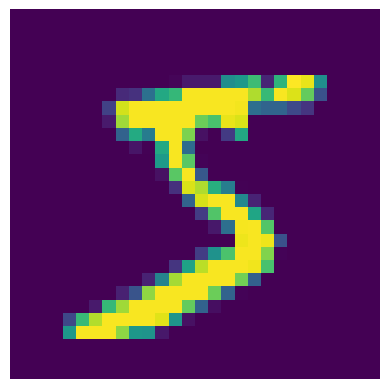

In [11]:
display( x_train[0] )

### Build a machine learning model

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten , Dropout , Dense

In [13]:
model = Sequential([
  Flatten(input_shape=(28, 28)),
  Dense(128, activation='relu'),
    Dropout(0.2),
  Dense(10)
])

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [15]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [16]:
history = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8539 - loss: 0.4875
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9556 - loss: 0.1519
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9670 - loss: 0.1072
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9714 - loss: 0.0901
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9779 - loss: 0.0722


In [17]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - 3ms/step - accuracy: 0.9785 - loss: 0.0734


[0.07342135906219482, 0.9785000085830688]

In [18]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

probability_model

<Sequential name=sequential_1, built=True>

In [19]:
probability_model = Sequential([
  model,
  tf.keras.layers.Softmax()
])

probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[3.0440511e-08, 1.3005673e-10, 1.4288889e-07, 3.3839049e-05,
        7.9228249e-11, 2.1730061e-07, 3.3567075e-14, 9.9995387e-01,
        2.1086768e-08, 1.1814960e-05],
       [6.5334740e-07, 1.1565639e-03, 9.9877304e-01, 5.2785697e-05,
        6.3640338e-16, 1.2616000e-05, 6.1109802e-07, 5.1410078e-12,
        3.7901787e-06, 2.1418216e-11],
       [9.2699935e-07, 9.9878818e-01, 4.2171968e-04, 7.6019269e-06,
        7.7391860e-06, 3.6219462e-06, 1.0507581e-05, 5.8498135e-04,
        1.7421730e-04, 6.1322476e-07],
       [9.9990487e-01, 4.1840156e-10, 2.2961760e-05, 7.4343683e-07,
        4.6609571e-06, 4.8131196e-06, 5.9897528e-05, 9.1899250e-07,
        3.5018375e-09, 1.1135621e-06],
       [6.3188622e-06, 1.1994412e-07, 1.5166435e-05, 3.4235125e-08,
        9.9956733e-01, 9.2333568e-07, 3.8740998e-07, 1.7999511e-05,
        3.4324785e-07, 3.9128089e-04]], dtype=float32)>

In [20]:
history.history

{'accuracy': [0.9119833111763,
  0.9569833278656006,
  0.9672499895095825,
  0.9722499847412109,
  0.9766833186149597],
 'loss': [0.2966981530189514,
  0.14470739662647247,
  0.10763909667730331,
  0.0880652442574501,
  0.07430882006883621]}

In [21]:
history.history['accuracy']

[0.9119833111763,
 0.9569833278656006,
 0.9672499895095825,
 0.9722499847412109,
 0.9766833186149597]